In [8]:
import numpy as np
import lvlspy.spcoll as lc
import lvlspy.io as li
coll = lc.SpColl()
li.update_from_xml(coll, "example.xml")
sp = coll.get()["my_species"]
T = 1.e9
probs = sp.compute_equilibrium_probabilities(T)
levels = sp.get_levels()
print(f"\nFor T = {T:.2e} K:\n")
for i, prob in enumerate(probs):
    print(f"i = {i:d}, E_i = {levels[i].get_energy():.2f} (keV), g_i ={levels[i].get_multiplicity():d}, P_i = {prob:.4f}")
    print(f"\nSum of probabilities = {np.sum(probs):.4f}\n")


For T = 1.00e+09 K:

i = 0, E_i = 0.00 (keV), g_i =1, P_i = 0.5533

Sum of probabilities = 1.0000

i = 1, E_i = 100.00 (keV), g_i =1, P_i = 0.1734

Sum of probabilities = 1.0000

i = 2, E_i = 200.00 (keV), g_i =4, P_i = 0.2173

Sum of probabilities = 1.0000

i = 3, E_i = 300.00 (keV), g_i =3, P_i = 0.0511

Sum of probabilities = 1.0000

i = 4, E_i = 500.00 (keV), g_i =3, P_i = 0.0050

Sum of probabilities = 1.0000



In [10]:
print("Levels:\n")
for i, level in enumerate(sp.get_levels()):
    print(f" Level {i:d}: E (keV) = {level.get_energy():0.2f}, g ={level.get_multiplicity(): d}")
    print("\n")
    print("Transitions:\n")
    for transition in sp.get_transitions():
        upper = transition.get_upper_level()
        lower = transition.get_lower_level()
        print(f" ({upper.get_energy():0.2f}, {upper.get_multiplicity():d})->({lower.get_energy():0.2f}, {lower.get_multiplicity():d}):{transition.get_einstein_a():.2e} (s^-1)")

Levels:

 Level 0: E (keV) = 0.00, g = 1


Transitions:

 (100.00, 1)->(0.00, 1):1.00e+02 (s^-1)
 (200.00, 4)->(100.00, 1):1.00e+02 (s^-1)
 (200.00, 4)->(0.00, 1):1.00e+02 (s^-1)
 (300.00, 3)->(200.00, 4):1.00e+02 (s^-1)
 (300.00, 3)->(100.00, 1):1.00e+02 (s^-1)
 (300.00, 3)->(0.00, 1):1.00e+02 (s^-1)
 (500.00, 3)->(300.00, 3):1.00e+02 (s^-1)
 (500.00, 3)->(200.00, 4):1.00e+02 (s^-1)
 (500.00, 3)->(100.00, 1):1.00e+02 (s^-1)
 (500.00, 3)->(0.00, 1):1.00e+02 (s^-1)
 Level 1: E (keV) = 100.00, g = 1


Transitions:

 (100.00, 1)->(0.00, 1):1.00e+02 (s^-1)
 (200.00, 4)->(100.00, 1):1.00e+02 (s^-1)
 (200.00, 4)->(0.00, 1):1.00e+02 (s^-1)
 (300.00, 3)->(200.00, 4):1.00e+02 (s^-1)
 (300.00, 3)->(100.00, 1):1.00e+02 (s^-1)
 (300.00, 3)->(0.00, 1):1.00e+02 (s^-1)
 (500.00, 3)->(300.00, 3):1.00e+02 (s^-1)
 (500.00, 3)->(200.00, 4):1.00e+02 (s^-1)
 (500.00, 3)->(100.00, 1):1.00e+02 (s^-1)
 (500.00, 3)->(0.00, 1):1.00e+02 (s^-1)
 Level 2: E (keV) = 200.00, g = 4


Transitions:

 (100.00, 1)->(0.00

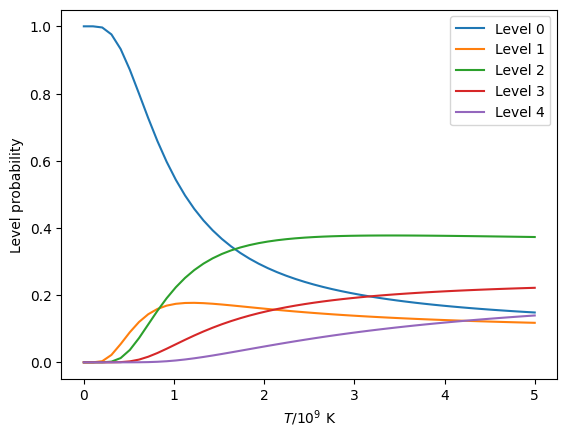

In [15]:
import matplotlib.pyplot as plt
T = np.linspace(0, 5)

p = []
for level in sp.get_levels():
    p.append([])

for temp in T:
    probs = sp.compute_equilibrium_probabilities(temp*1.e9)
    for i, prob in enumerate(probs):
        p[i].append(prob)

for i, pl in enumerate(p):
    plt.plot(T, pl, label=f"Level {i:d}")

plt.xlabel('$T / 10^9\\ {\\rm K}$')
plt.ylabel('Level probability')
plt.legend()

plt.show()

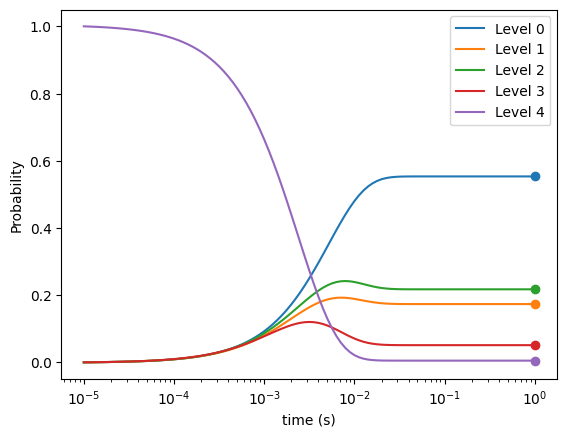

In [16]:
from scipy.integrate import odeint

# Define the differential equations

def evolve(p, t, a):
    return a.dot(p)

# Get the species collection and retrieve the species

coll = lc.SpColl()

li.update_from_xml(coll, "example.xml")

sp = coll.get()["my_species"]

# Set the temperature and initial probabilities

T = 1.e9

p = np.zeros(len(sp.get_levels()))

p[len(p)-1] = 1

# Set the times on a logarithmic scale

t = np.logspace(-5, 0, 101)

# Evolve and plot the probabilities

sol = odeint(evolve, p, t, args=(sp.compute_rate_matrix(T),))

for i in range(sol.shape[1]):
    plt.plot(t, sol[:,i], label=f"Level {i:d}")

# Get and plot the equilibrium probabilities

plt.gca().set_prop_cycle(None)

p_eq = sp.compute_equilibrium_probabilities(T)

for i in range(len(p_eq)):
    plt.plot(1, p_eq[i], 'o')

plt.xscale('log')

plt.xlabel('time (s)')
plt.ylabel('Probability')

plt.legend()
plt.show()